In [247]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym

In [248]:
archivo = open("Newton_Gregory.csv")
datos = pd.read_csv(archivo,sep=',')
print(datos)

     X   Y
0  0.0 -18
1  1.5 -13
2  2.0   0
3  3.8   5
4  4.2   3
5  5.9  10


In [249]:
X = np.float64(datos['X'])
Y = np.float64(datos['Y'])

In [250]:
def Newton_Gregory(X,Y,x):
    p = Y[0]
    df = np.zeros((len(X),len(Y)))
    df[:,0] = Y
    pol = 1
    for i in range(1,len(X)):
        pol *= (x-X[i-1])
        for j in range(i,len(X)):            
            df[j,i] = (df[j,i-1]-df[j-1,i-1])/(X[j]-X[j-i])
        p += pol*df[i,i] 
    return p

In [251]:
#Polinomio
x = sym.Symbol("x")
polinomio = Newton_Gregory(X,Y,x).expand()
polinomio

-0.34145435774264*x**5 + 5.84804869821673*x**4 - 35.6998197753506*x**3 + 89.657566164176*x**2 - 68.8369730888011*x - 18.0

In [252]:
#Gráfica
eje_x = np.linspace(np.min(X), np.max(X),100)
eje_y = Newton_Gregory(X,Y,eje_x)

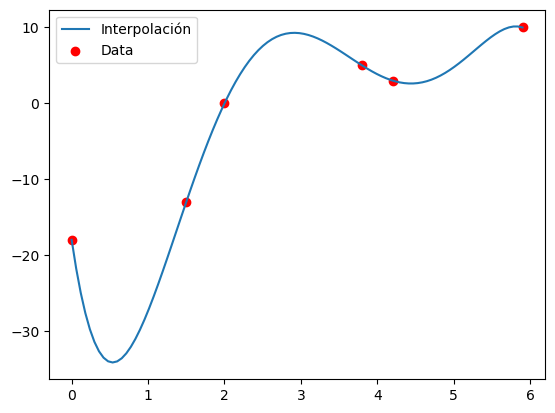

In [253]:
plt.plot(eje_x,eje_y, label="Interpolación")
plt.scatter(X,Y, color="r", label="Data")
plt.legend(loc=0)
plt.show()